GARCH Volatility Forcasting

In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [3]:
start = datetime(2000, 1, 1)
end = datetime(2024, 9, 1)

spy = yf.Ticker("SPY")
hst = spy.history(start=start, end=end)

returns = 100 * hst.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

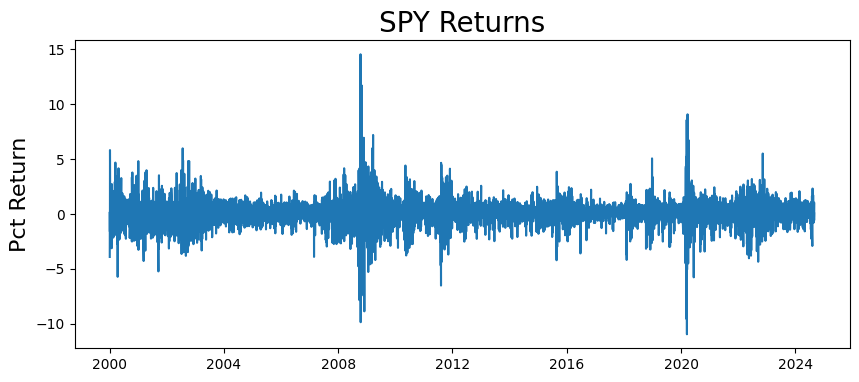

In [4]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

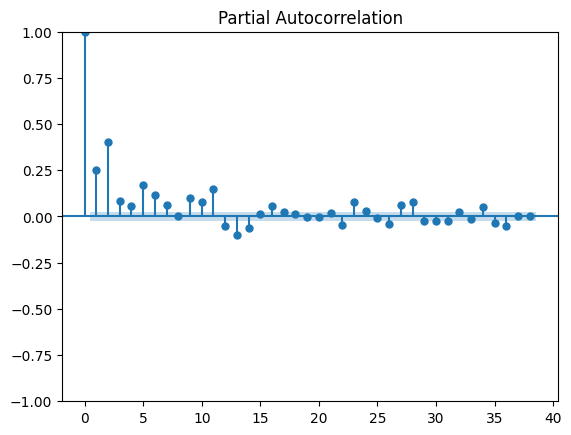

In [5]:
plot_pacf(returns**2)
plt.show()

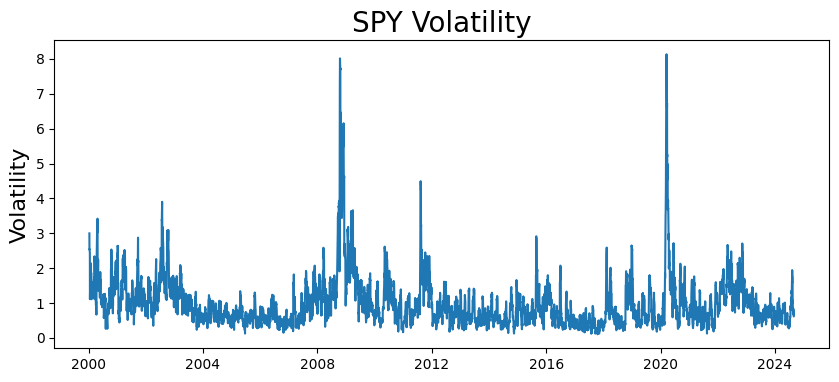

In [6]:
# Calculate the rolling standard deviation (volatility)
volatility = np.sqrt(returns.rolling(window=7).var())

# Plot the volatility
plt.figure(figsize=(10, 4))
plt.plot(volatility)
plt.ylabel('Volatility', fontsize=16)
plt.title('SPY Volatility', fontsize=20)
plt.show()

In [7]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 119280.9695351875
Iteration:      2,   Func. Count:     21,   Neg. LLF: 36087.041291371075
Iteration:      3,   Func. Count:     32,   Neg. LLF: 13158.118340191577
Iteration:      4,   Func. Count:     41,   Neg. LLF: 11436.651590671414
Iteration:      5,   Func. Count:     50,   Neg. LLF: 8712.732562674053
Iteration:      6,   Func. Count:     58,   Neg. LLF: 8527.64216756543
Iteration:      7,   Func. Count:     66,   Neg. LLF: 8528.94365326827
Iteration:      8,   Func. Count:     74,   Neg. LLF: 8583.177549549066
Iteration:      9,   Func. Count:     83,   Neg. LLF: 8522.233036649546
Iteration:     10,   Func. Count:     90,   Neg. LLF: 8522.206925642546
Iteration:     11,   Func. Count:     97,   Neg. LLF: 8522.20508287026
Iteration:     12,   Func. Count:    104,   Neg. LLF: 8522.204988312937
Iteration:     13,   Func. Count:    111,   Neg. LLF: 8522.204987294721
Iteration:     14,   Func. Count:    117,   Neg. LLF: 8522.20498

Fit Model

In [8]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=7)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

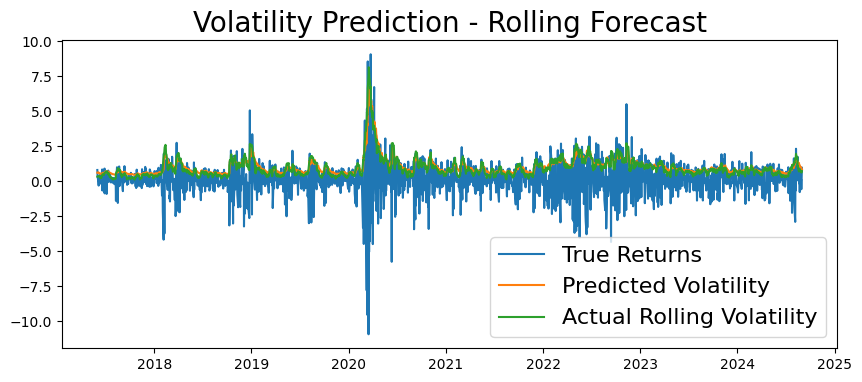

In [9]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
vol, = plt.plot(volatility[-365*5:])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility', 'Actual Rolling Volatility'], fontsize=16)

In [28]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
v = yf.Ticker("SPY").history(start=future_dates[0].date(), end=future_dates[-1].date()).Close.var()
print(pred)

2024-08-31 00:00:00-04:00    0.820884
2024-09-01 00:00:00-04:00    0.850757
2024-09-02 00:00:00-04:00    0.843266
2024-09-03 00:00:00-04:00    0.860252
2024-09-04 00:00:00-04:00    0.860613
2024-09-05 00:00:00-04:00    0.871720
2024-09-06 00:00:00-04:00    0.875370
dtype: float64


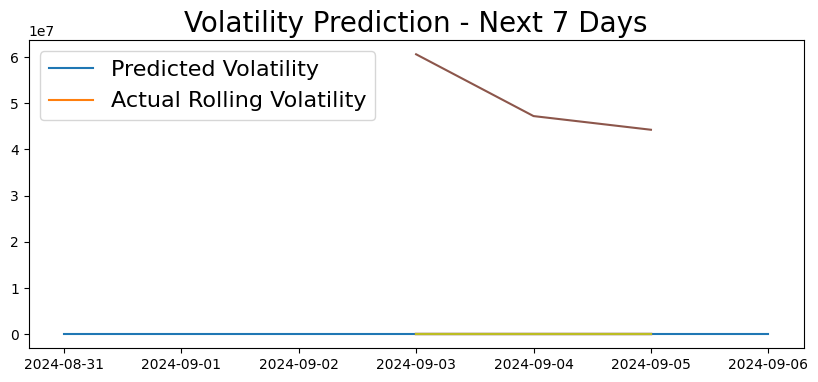

In [21]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.plot(v)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.legend(['Predicted Volatility', 'Actual Rolling Volatility'], fontsize=16)